/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-412485765.py:27: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n)) * np.sum((y_pred - y)**2) + (lamda/(2*n)) * np.sum(w[1:]**2)
/tmp/ipython-input-412485765.py:50: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_cost - cost) < tol:


NaN detected in y_pred or y for lr=1, lambda=1e-15!
NaN detected in y_pred or y for lr=1, lambda=1e-10!
NaN detected in y_pred or y for lr=1, lambda=1e-05!
NaN detected in y_pred or y for lr=1, lambda=0.001!
NaN detected in y_pred or y for lr=1, lambda=0!
NaN detected in y_pred or y for lr=1, lambda=1!


/tmp/ipython-input-412485765.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  cost = (1/(2*n)) * np.sum((y_pred - y)**2) + (lamda/(2*n)) * np.sum(w[1:]**2)
/tmp/ipython-input-412485765.py:34: RuntimeWarning: invalid value encountered in multiply
  gradient[1:] += (lamda/n) * w[1:]


NaN detected in y_pred or y for lr=1, lambda=10!
NaN detected in y_pred or y for lr=1, lambda=20!
NaN detected in y_pred or y for lr=10, lambda=1e-15!
NaN detected in y_pred or y for lr=10, lambda=1e-10!
NaN detected in y_pred or y for lr=10, lambda=1e-05!
NaN detected in y_pred or y for lr=10, lambda=0.001!
NaN detected in y_pred or y for lr=10, lambda=0!
NaN detected in y_pred or y for lr=10, lambda=1!
NaN detected in y_pred or y for lr=10, lambda=10!
NaN detected in y_pred or y for lr=10, lambda=20!

 Best Ridge Regression Parameters:
Learning_Rate    1.000000e-01
Lambda           1.000000e-15
Final_Cost       4.887992e-01
R2_Score         9.763632e-01
Name: 24, dtype: float64

All Results (sorted by R2):
    Learning_Rate        Lambda  Final_Cost  R2_Score
24           0.10  1.000000e-15    0.488799  0.976363
28           0.10  0.000000e+00    0.488799  0.976363
25           0.10  1.000000e-10    0.488799  0.976363
26           0.10  1.000000e-05    0.488799  0.976363
27          

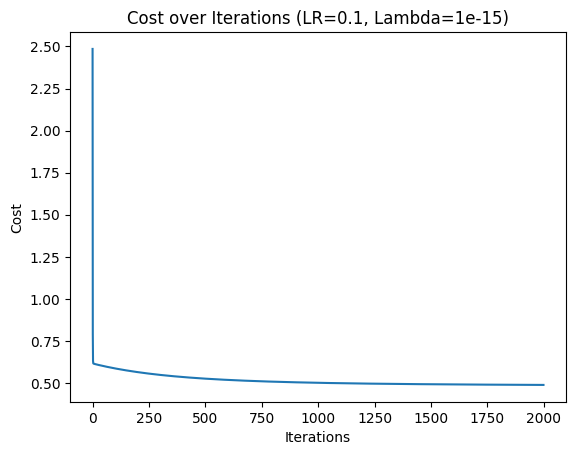

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import itertools


np.random.seed(42)


n_samples = 500
x_base = np.random.randn(n_samples, 1)

x = np.hstack([x_base + np.random.normal(0, 0.02, (n_samples, 1)) * i for i in range(1, 8)])
true_weight = np.array([2, -1, 3, 0.5, -2, 1.5, 2.5])
y = x.dot(true_weight) + np.random.normal(0, 1, n_samples)


x = (x - x.mean(axis=0)) / x.std(axis=0)

x = np.c_[np.ones(x.shape[0]), x]
n_features = x.shape[1]


def ridge_cost(x, y, w, lamda):
    n = len(y)
    y_pred = x.dot(w)
    cost = (1/(2*n)) * np.sum((y_pred - y)**2) + (lamda/(2*n)) * np.sum(w[1:]**2)
    return cost

def ridge_gradient(x, y, w, lamda):
    n = len(y)
    y_pred = x.dot(w)
    gradient = (1/n) * x.T.dot(y_pred - y)
    gradient[1:] += (lamda/n) * w[1:]
    return gradient

def ridge_regression(x, y, lr, lamda, iterations=2000, tol=1e-6):
    n_features = x.shape[1]
    w = np.zeros(n_features)
    prev_cost = float('inf')
    cost_history = []

    for i in range(iterations):
        grad = ridge_gradient(x, y, w, lamda)
        w -= lr * grad
        cost = ridge_cost(x, y, w, lamda)
        cost_history.append(cost)


        if abs(prev_cost - cost) < tol:
            break
        prev_cost = cost

    return w, cost_history


learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lambdas = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]

results = []

for lr, lam in itertools.product(learning_rates, lambdas):

    w, cost_history = ridge_regression(x, y, lr, lam)


    y_pred = x.dot(w)


    y_pred = y_pred.flatten()

    if np.any(np.isnan(y_pred)) or np.any(np.isnan(y)):
        print(f"NaN detected in y_pred or y for lr={lr}, lambda={lam}!")
        continue

    r2 = r2_score(y, y_pred)
    final_cost = cost_history[-1]

    results.append((lr, lam, final_cost, r2))


results_df = pd.DataFrame(results, columns=["Learning_Rate", "Lambda", "Final_Cost", "R2_Score"])


best_result = results_df.loc[results_df["R2_Score"].idxmax()]

print("\n Best Ridge Regression Parameters:")
print(best_result)


print("\nAll Results (sorted by R2):")
print(results_df.sort_values(by="R2_Score", ascending=False).head(10))


import matplotlib.pyplot as plt

best_lr = best_result['Learning_Rate']
best_lambda = best_result['Lambda']

w_best, cost_history_best = ridge_regression(x, y, best_lr, best_lambda)


plt.plot(cost_history_best)
plt.title(f"Cost over Iterations (LR={best_lr}, Lambda={best_lambda})")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Hitters.csv")

print("Initial shape:", df.shape)
print("\nPreview:\n", df.head())


print("\nMissing values:\n", df.isnull().sum())

df = df.dropna(subset=['Salary'])

df = df.dropna()

print("\nShape after dropping missing values:", df.shape)


categorical_cols = ['League', 'Division', 'NewLeague']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop(columns=['Salary'])
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alpha = 0.5748


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=alpha, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)


models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model
}

print("\nModel Performance on Test Set:")
print("-----------------------------------------------------")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name:20s} | R²: {r2:.4f} | MSE: {mse:.4f}")

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear_Coef': lr_model.coef_,
    'Ridge_Coef': ridge_model.coef_,
    'Lasso_Coef': lasso_model.coef_
})

print("\nTop 10 features by absolute Linear Coefficients:")
print(coef_df.reindex(coef_df['Linear_Coef'].abs().sort_values(ascending=False).index).head(10))


Initial shape: (322, 20)

Preview:
    AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  

Missing values

/tmp/ipython-input-3517783831.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

 Model Comparison:
RidgeCV → R²: 0.7079, MSE: 21.7645, Best α: 8.286427728546842
LassoCV → R²: 0.7112, MSE: 21.5215, Best α: 0.001


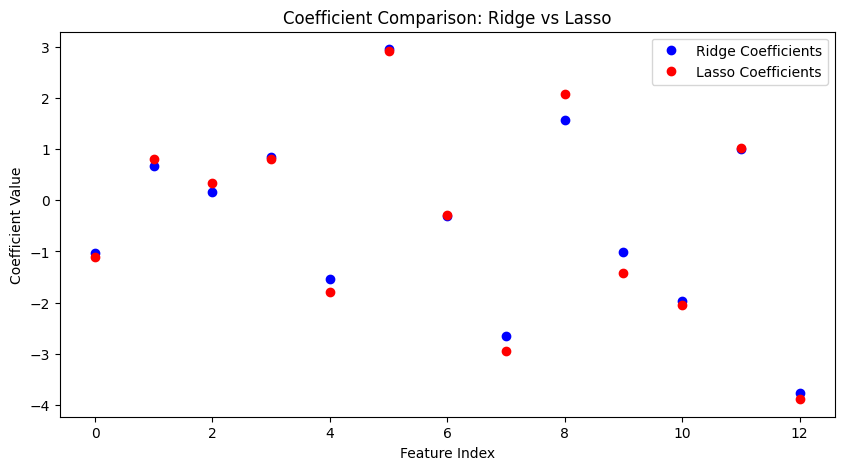

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt



df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
print(df.head())
print(df.columns)


X = df.drop('MEDV', axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alphas = np.logspace(-3, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)


y_pred_ridge = ridge_cv.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)


lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_cv.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)


print("\n Model Comparison:")
print(f"RidgeCV → R²: {ridge_r2:.4f}, MSE: {ridge_mse:.4f}, Best α: {ridge_cv.alpha_}")
print(f"LassoCV → R²: {lasso_r2:.4f}, MSE: {lasso_mse:.4f}, Best α: {lasso_cv.alpha_}")


plt.figure(figsize=(10,5))
plt.plot(ridge_cv.coef_, 'bo', label='Ridge Coefficients')
plt.plot(lasso_cv.coef_, 'ro', label='Lasso Coefficients')
plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def logistic_regression_train(X, y, lr=0.1, num_iter=1000):
    """
    Trains a logistic regression classifier using gradient descent
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for i in range(num_iter):

        z = np.dot(X, w) + b

        y_pred = sigmoid(z)

        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)

        w -= lr * dw
        b -= lr * db
    return w, b
class OvRLogisticRegression:
    def __init__(self, lr=0.1, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.classes_ = None
        self.weights_ = {}
        self.biases_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:

            y_binary = (y == cls).astype(int)
            w, b = logistic_regression_train(X, y_binary, lr=self.lr, num_iter=self.num_iter)
            self.weights_[cls] = w
            self.biases_[cls] = b

    def predict(self, X):

        probs = np.zeros((X.shape[0], len(self.classes_)))
        for idx, cls in enumerate(self.classes_):
            z = np.dot(X, self.weights_[cls]) + self.biases_[cls]
            probs[:, idx] = sigmoid(z)

        return np.argmax(probs, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ovr_model = OvRLogisticRegression(lr=0.1, num_iter=5000)
ovr_model.fit(X_train_scaled, y_train)
y_pred = ovr_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {acc:.4f}")


Features shape: (150, 4)
Labels shape: (150,)
Accuracy on test set: 0.8667
